**Maddie Puzon**

Spring 2024

CS 252: Mathematical Data Analysis and Visualization

# Lab 2a | Linear Regression

## Task 1: Mystery Data 1

### 1a. Import the data

1. Import data '`data/mystery_data_1.csv'` (using your data class or [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html))
2. Print first 10 lines rows of data.

#### 1b. Using the following links and matplotlib documentation to view the data:
- [matplotlib](https://matplotlib.org/)
- [matplotlib hist](https://matplotlib.org/gallery/statistics/hist.html)
1. Create a figure with 3 subplots (each with a title):
    1. One scatterplot with column X on the x-axis and column Y on the y-axis.
    2. Two histograms: one for the X data, the other for the Y data. Use 10 bins in each histogram.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from data import Data
from analysis import Analysis
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams["figure.figsize"] = [12,4.5]

# Your code here
filepath = 'data/mystery_data_1.csv'
data = Data(filepath)

print(data.select_data(data.get_headers(), np.arange(0,10)))

print('''-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------
''')

[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------



## Task 2: Analyze Mystery Data 1

### 2a. Use scipy to calculate the linear regression for Mystery Data 1 

Print first 10 lines rows of data.

Calculate the linear regression [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)
- The `a` parameter is the `A` array of independent data variables, the `b` parameter is the `y` array of the dependent variable values.
- Note that `A` matrix should include the column of 1s for the intercept. 
- Useful: [hstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html), [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) and `np.newaxis` (or [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)).

**NOTE:** One of the things that `scipy.linalg.lstsq` returns is the **residues**, which is another name for the sum of all the squared errors (**SSE**). This is different than the residuals, which refer to just the set of errors (i.e. differences between value on regression curve and actual data sample), not their sum of squares.

Print the least-squares solved coefficients and residues.

Using the SSE, calculate and print the $R^2$ value using the following equations:

$R^2 = 1 - \frac{SSE}{smd}$

The square mean deviation: $smd = \sum_i^N \left ( y_i - \frac{1}{N} \sum_i^N y_i \right )^2$

In [21]:
import scipy.linalg

# get arrays from data object
y = data.select_data(['Y'])
A = data.select_data(['X'])
# add col of 1s to A for intercept;
ones = np.ones(A.shape)
A_ones = np.hstack((ones,A))

c, residues, rank, s = scipy.linalg.lstsq(A_ones,y)
sse = residues[0]

# calculate smd
an = Analysis(data)
# subtract mean from each values
smd = y - an.mean(['Y'])
# square each value
smd = np.power(smd, 2)
# sum values to get final smd value
smd = np.sum(smd)

# calculate r^2
r2 = 1 - (sse / smd)

print(f'''
c: {c}

SSE: {residues[0]}

r2: {r2}''')

print('''-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

SSE: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------
''')


c: [[ 0.92884793]
 [-0.05650709]]

SSE: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

SSE: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------



### 2b. Visualize linear regression results with matplotlib

1. Plot a scatterplot of the mystery data X on the x axis and Y on the y axis
2. Plot a line representing the linear regression
    1. For line_x, use [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create 100 points from the min x value to the max x value
    2. For line_y, multiply line_x by the slope and add the intercept
3. Include a title (with $R^2$ value), legend, x label and y label

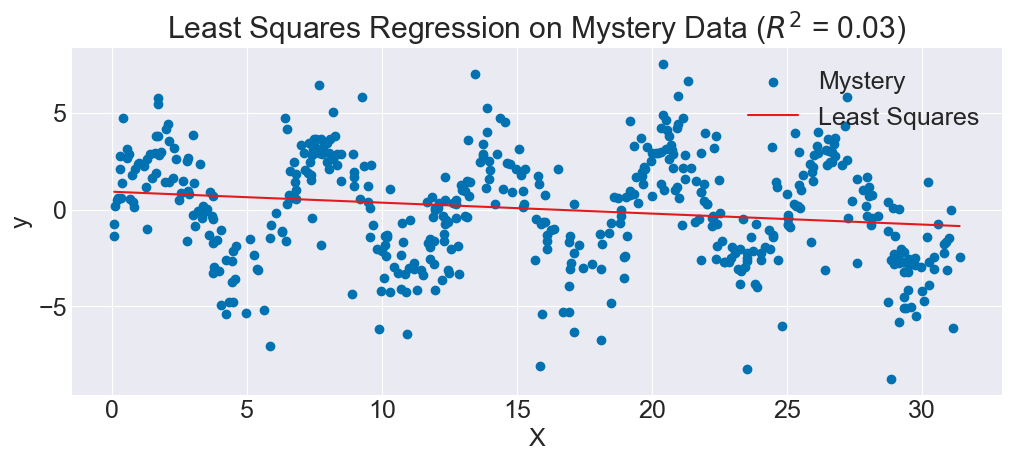

In [31]:
from analysis import Analysis
an = Analysis(data)

x = data.select_data(['X'])
y = data.select_data(['Y'])

line_x = np.linspace(x.min(), x.max(), num=100)
line_y = line_x * c[1] + c[0]

plt.scatter(x,y,label='Mystery')
plt.plot(line_x, line_y, label='Least Squares',color=plt.cm.Set1.colors[0])

plt.xlabel("X")
plt.ylabel("y")
# plt.title(f"Least Squares Regression on Mystery Data ($R^2$ = {r2}")
plt.title("Least Squares Regression on Mystery Data ($R^2$ = {:.2f})".format(r2))

plt.legend()
plt.show()

### 2c.  Interpret the results of the linear regression of the dataset 

**Question 1:** Interpret the results based on your plot and $R^2$ value. Is the linear regression model a good model for the data? **Why?**

**Answer 1:** No, the line does't intersect or even get close to most of the data points. A sin curve would fit the data much better. The linear regression model also suggests a negative association between the varaibles when that doesn't seem to be the case.